In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, normalize,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')

In [2]:
#labels = 'Year_Birth',	'Education',	'Marital_Status',	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	'
feature_names = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
target = 'Kidhome'

df = pd.read_csv('./marketing_campaign.csv',delimiter='\t')[feature_names + [target]]
df.head()

,Year_Birth,Education,Marital_Status,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,Kidhome
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,0
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,0
3,1984,Graduation,Together,26646.0,0,26,11,4,20,10,1
4,1981,PhD,Married,58293.0,0,94,173,43,118,46,1


In [3]:
le_all = {}
for i in ['Education', 'Marital_Status']:
    le_all[i] = LabelEncoder()
    le_all[i].fit(df[i].unique())
    df[i] = le_all[i].transform(df[i])

print(df.head())
print(df.describe())

   Year_Birth  Education  Marital_Status   Income  Teenhome  Recency  \
0        1957          2               4  58138.0         0       58   
1        1954          2               4  46344.0         1       38   
2        1965          2               5  71613.0         0       26   
3        1984          2               5  26646.0         0       26   
4        1981          4               3  58293.0         0       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  Kidhome  
0       635         88              546              172        0  
1        11          1                6                2        1  
2       426         49              127              111        0  
3        11          4               20               10        1  
4       173         43              118               46        1  
        Year_Birth    Education  Marital_Status         Income     Teenhome  \
count  2240.000000  2240.000000     2240.000000    2216.000000  2240.000000   
m

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Birth       2240 non-null   int64  
 1   Education        2240 non-null   int64  
 2   Marital_Status   2240 non-null   int64  
 3   Income           2216 non-null   float64
 4   Teenhome         2240 non-null   int64  
 5   Recency          2240 non-null   int64  
 6   MntWines         2240 non-null   int64  
 7   MntFruits        2240 non-null   int64  
 8   MntMeatProducts  2240 non-null   int64  
 9   MntFishProducts  2240 non-null   int64  
 10  Kidhome          2240 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 192.6 KB


In [5]:
for i in df.columns:
    print( f'Number of NaN in {i} is \t{df[i].isna().sum()}')

df = df.dropna()

Number of NaN in Year_Birth is 	0
Number of NaN in Education is 	0
Number of NaN in Marital_Status is 	0
Number of NaN in Income is 	24
Number of NaN in Teenhome is 	0
Number of NaN in Recency is 	0
Number of NaN in MntWines is 	0
Number of NaN in MntFruits is 	0
Number of NaN in MntMeatProducts is 	0
Number of NaN in MntFishProducts is 	0
Number of NaN in Kidhome is 	0


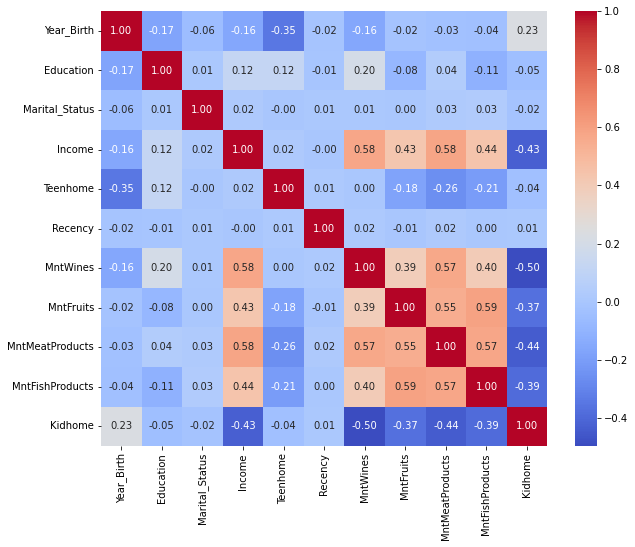

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

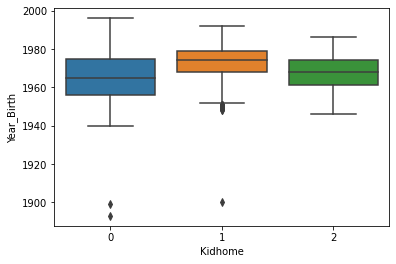

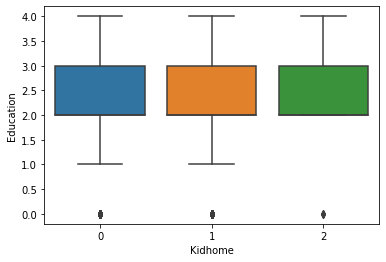

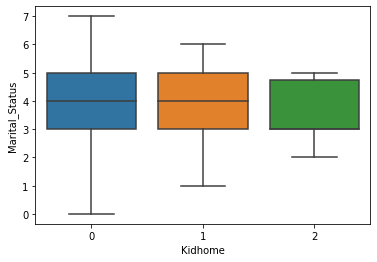

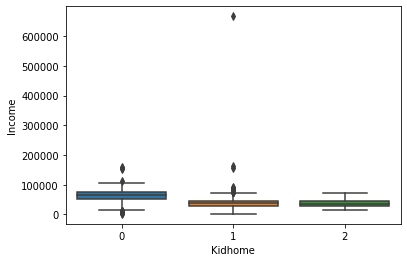

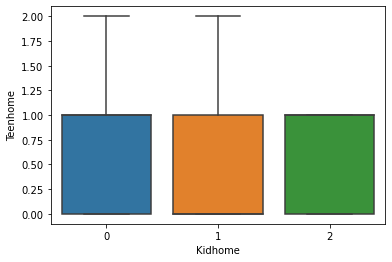

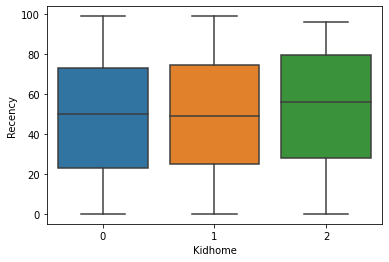

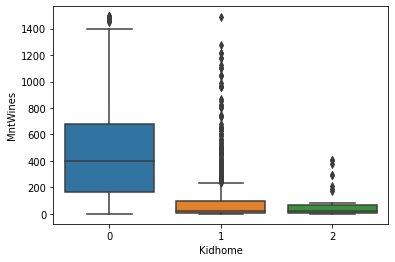

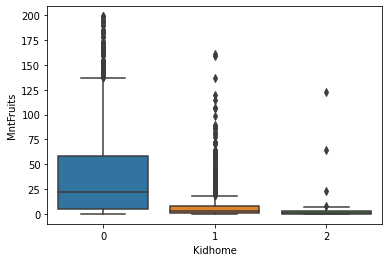

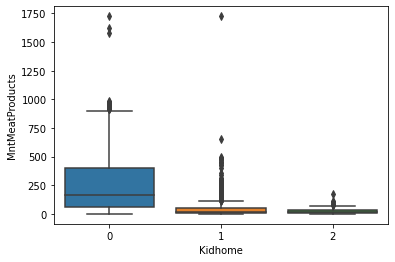

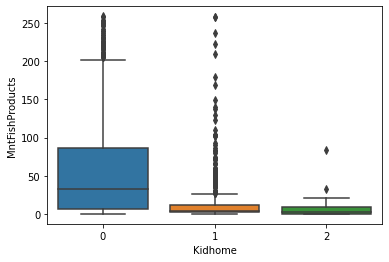

In [7]:
for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(y=feature_names[i], x=target, data=df)

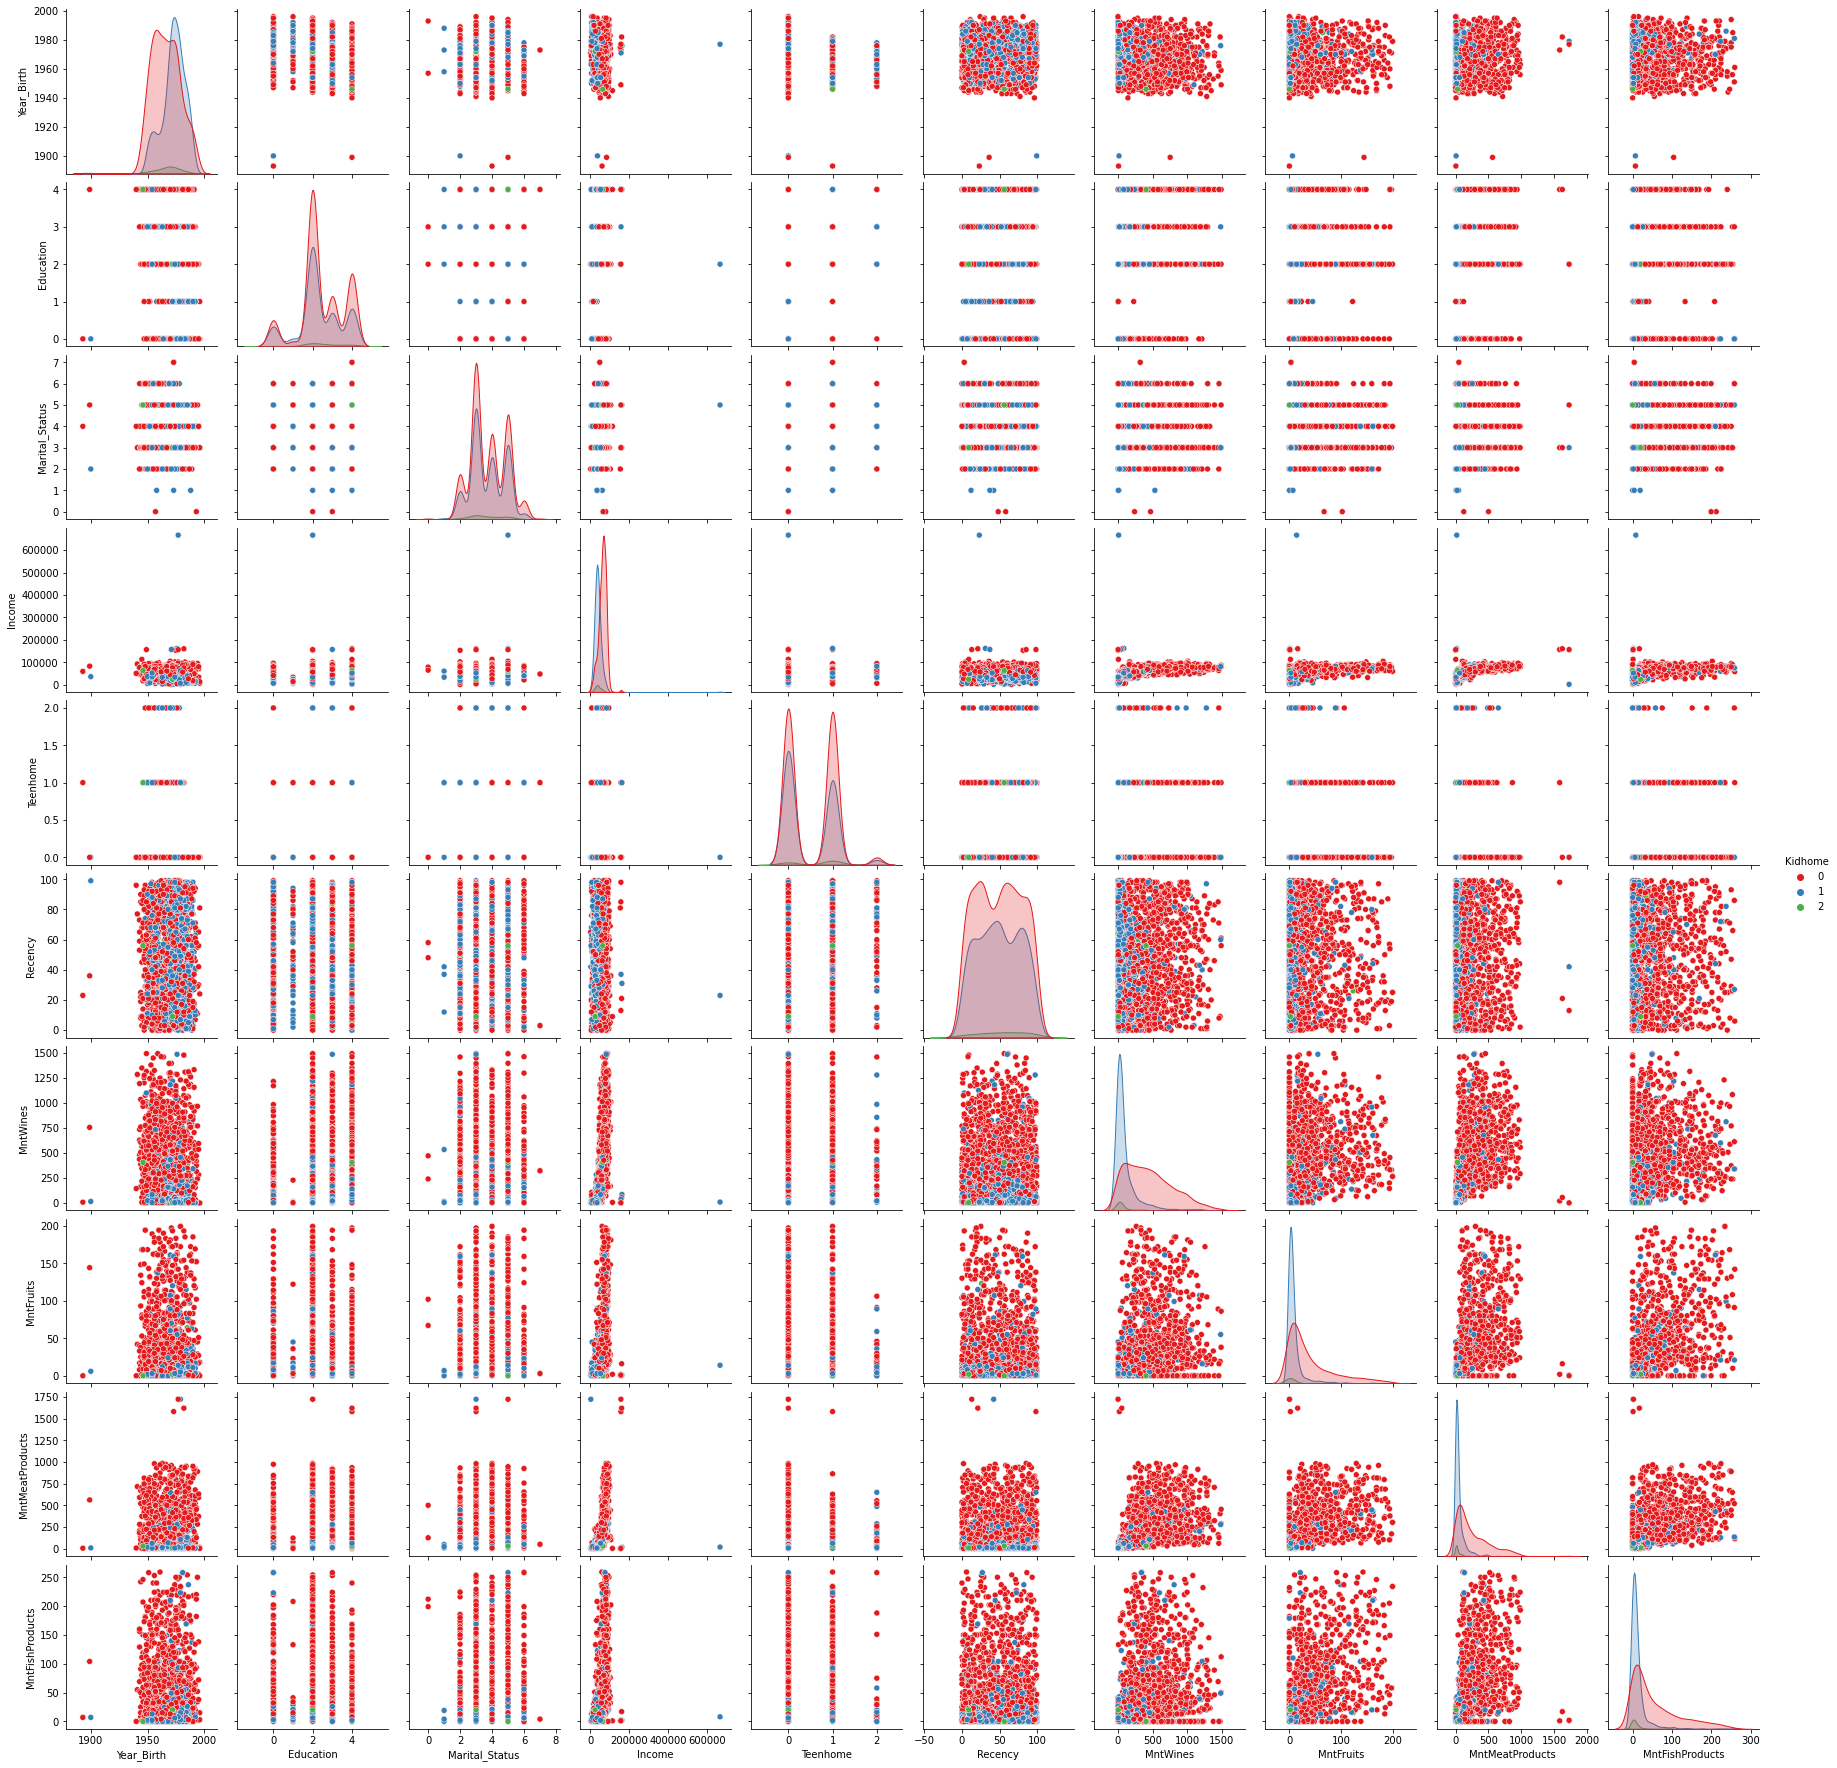

In [21]:
sns.pairplot(df, hue=target, palette = 'Set1')

In [10]:
X_ = df.drop([target],axis=1)
Y_ = df[target].astype(int)


print('original shapes:', X_.shape, Y_.shape)

original shapes: (2216, 10) (2216,)


In [12]:
# normalize

for i in ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']:
    X_[i] = normalize([X_[i]]).reshape(X_[i].shape)


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.25)

print('train shapes:', X_train.shape, y_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

train shapes: (1662, 10) (1662,)


### Decicion tree

In [90]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       317
           1       0.70      0.73      0.71       228
           2       0.07      0.11      0.09         9

    accuracy                           0.75       554
   macro avg       0.53      0.54      0.54       554
weighted avg       0.76      0.75      0.76       554



In [92]:
confusion_matrix(y_test, y_pred)

array([[250,  65,   2],
       [ 50, 167,  11],
       [  0,   8,   1]])

### KNN

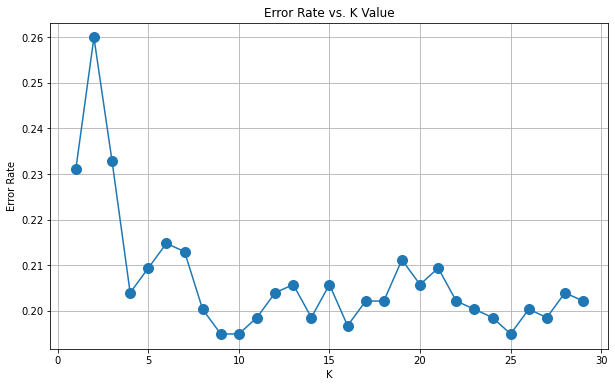

In [93]:
from sklearn.neighbors import KNeighborsClassifier

#choose k

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [94]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[254  63   0]
 [ 36 192   0]
 [  2   7   0]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       317
           1       0.73      0.84      0.78       228
           2       0.00      0.00      0.00         9

    accuracy                           0.81       554
   macro avg       0.53      0.55      0.54       554
weighted avg       0.80      0.81      0.80       554



/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [95]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV


In [97]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 5000, 10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)

grid.fit( X_train,y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [98]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [99]:
grid_predictions = grid.predict(X_test)

In [101]:
print(confusion_matrix(y_test,grid_predictions))

[[258  59   0]
 [ 34 194   0]
 [  1   8   0]]


In [102]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       317
           1       0.74      0.85      0.79       228
           2       0.00      0.00      0.00         9

    accuracy                           0.82       554
   macro avg       0.54      0.55      0.55       554
weighted avg       0.81      0.82      0.81       554



/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### random forest

In [103]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[277  40   0]
 [ 34 193   1]
 [  0   8   1]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       317
           1       0.80      0.85      0.82       228
           2       0.50      0.11      0.18         9

    accuracy                           0.85       554
   macro avg       0.73      0.61      0.63       554
weighted avg       0.85      0.85      0.85       554



### AdaBoost

In [104]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

pred = abc.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[258  58   1]
 [ 53 175   0]
 [  3   5   1]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       317
           1       0.74      0.77      0.75       228
           2       0.50      0.11      0.18         9

    accuracy                           0.78       554
   macro avg       0.69      0.56      0.58       554
weighted avg       0.78      0.78      0.78       554

